In [70]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)


In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("C:/Users/dude/Downloads/cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [4]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
cad_jpy_df['Return'] = cad_jpy_df.Price.pct_change() * 100
cad_jpy_df = cad_jpy_df.resample('D').mean()
cad_jpy_df = cad_jpy_df.dropna()
cad_jpy_df.tail()

,Price,Open,High,Low,Return
Date,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508
2020-06-03,80.70,80.40,80.82,79.96,0.373134
2020-06-04,80.71,80.80,80.89,80.51,0.012392


<AxesSubplot:xlabel='Date'>

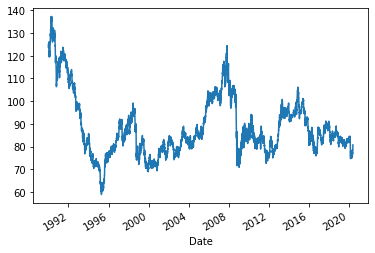

In [5]:
cad_jpy_df.Price.plot()

In [6]:
#Question: Do you see any patterns, long-term and/or short? 
#Answer: we dont see any batterns just a side way movment

In [8]:
#Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.
import statsmodels.api as sm
cad_jpy_noise, cad_jpy_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"]) 

In [30]:
cad_jpy_New = cad_jpy_df.drop(columns=["Open","High","Low","Return"])
cad_jpy_New["noise"] = cad_jpy_noise
cad_jpy_New["Trend"] = cad_jpy_trend

In [31]:
cad_jpy_New.head()

,Price,noise,Trend
Date,,,
1990-01-03,125.30,-0.263973,125.563973
1990-01-04,123.46,-1.947267,125.407267
1990-01-05,124.54,-0.710395,125.250395
1990-01-08,124.27,-0.821977,125.091977
1990-01-09,125.10,0.169814,124.930186


<AxesSubplot:xlabel='Date'>

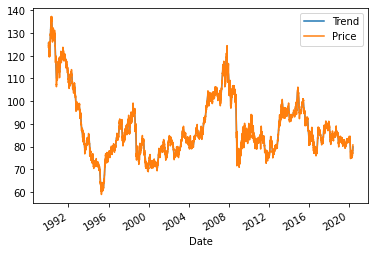

In [56]:
cad_jpy_New[['Trend','Price']].plot()


In [57]:
#Question: Do you see any patterns, long-term and/or short? 
#Answer: I can See a bit of down trend long term

<AxesSubplot:xlabel='Date'>

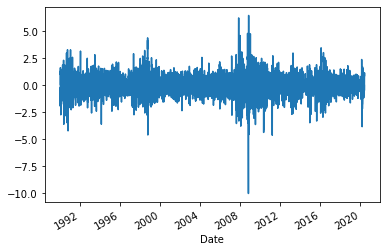

In [58]:
# Plot the Settle Noise
cad_jpy_New['noise'].plot()

In [59]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [74]:
import statsmodels.api as sm
# Estimate and ARMA model using statsmodels (use order=(2, 1))

from statsmodels.tsa.arima_model import ARMA 


In [75]:
model = ARMA(returns.values, order=(2,1))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [69]:
results = model.fit() 

NameError: name 'model' is not defined

In [77]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(cad_jpy_New['Price'], order=(5, 1, 1))

# Fit the model
results = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [78]:
results = model.fit() 

NameError: name 'model' is not defined

In [79]:
import arch as arch

In [80]:
# Estimate a GARCH model:
from arch import arch_model
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)
# Fit the model
res = model.fit(disp="off") 

In [81]:
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8909.76
Distribution:                  Normal   AIC:                           17825.5
Method:            Maximum Likelihood   BIC:                           17846.5
                                        No. Observations:                 7927
Date:                Sun, Aug 07 2022   Df Residuals:                     7927
Time:                        22:01:09   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.0705e-03  2.400e-03      3.779  1.573e-04 [4.366e-03,1.377e-02]
alpha[1]       0.0624  9.000e-03      6.937  4.009e-12 [4.479e-02,8.007e-02]
beta[1]        0.9243  1.110e-02     83.282      0.000     [  0.903,  0.946]
============================================================================

Covariance estimator: robust
"""

In [82]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [83]:
# Create a 5 day forecast of volatility
forecast_horizon = 5


In [84]:
forecasts = res.forecast(start='2020-06-04', horizon=forecast_horizon)
forecasts

In [85]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566438,12.574127,12.581709,12.589187,12.596561


In [86]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566438
h.2,12.574127
h.3,12.581709
h.4,12.589187
h.5,12.596561


<AxesSubplot:>

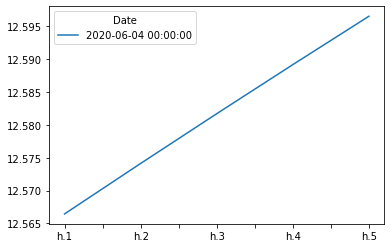

In [87]:
final.plot()

In [ ]:
#Conclusions
 
#Based on your time series analysis, would you buy the yen now?
#YEs

 
#Is the risk of the yen expected to increase or decrease?
#Decrease

 
#Based on the model evaluation, would you feel confident in using these models for trading?
#the Garch model gave a good analysis and i would use it but not alone but by including other indicatiors 